In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/media_salarial.csv'

In [ ]:
salarial = pd.read_csv(url,sep='\t')

In [ ]:
salarial.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = [10,6]

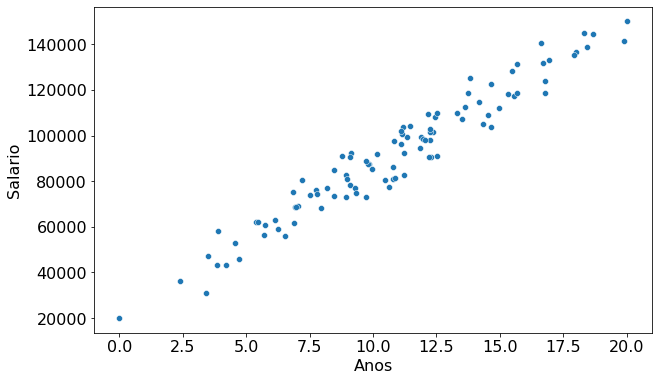

In [ ]:
sns.scatterplot(x='Anos',y='Salario',data=salarial)

## <font color=blue> Covariância </font>

A covariância é a medida do grau de interdependência numérica entre duas variáveis. 

### Covariância populacional

\begin{equation}
\sigma_{xy} = \frac{1}{n} \sum_{i=1}^n (X_i - \mu_x)(Y_i - \mu_y)
\end{equation}

### Covariância amostral
\begin{equation}
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
\end{equation}

In [ ]:
amostra = salarial.sample(n = 20, random_state=202)

In [ ]:
amostra.cov()

,Anos,Salario
Anos,14.191227,8.544902e+04
Salario,85449.017586,5.552975e+08


## <font color=blue> Correlação </font>

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

In [ ]:
amostra.corr()

,Anos,Salario
Anos,1.000000,0.962574
Salario,0.962574,1.000000


https://plotlygraphs.medium.com/spurious-correlations-56752fcffb69

## <font color=blue>  Regressão Linear </font>


\begin{equation}
Y_i = \beta_1 + \beta_2 X_i
\end{equation}

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

In [ ]:
salarial.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


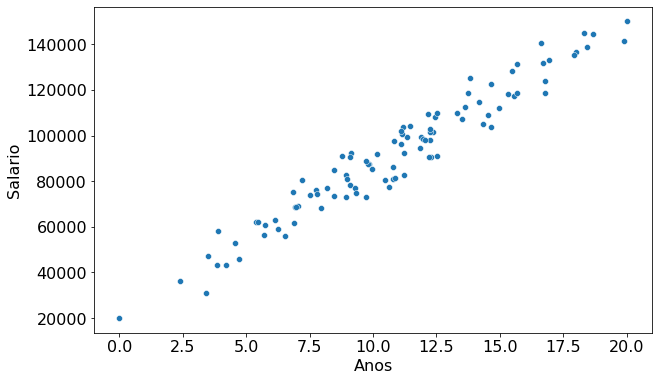

In [ ]:
sns.scatterplot(x='Anos',y='Salario',data=salarial)

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$


# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = sm.add_constant(salarial['Anos'])

In [ ]:
Y = salarial['Salario']

In [ ]:
X.head()

,const,Anos
0,1.0,9.096218
1,1.0,14.637429
2,1.0,12.255808
3,1.0,7.215160
4,1.0,6.905628


In [ ]:
resultado_regressao = sm.OLS(Y,X).fit()

In [ ]:
resultado_regressao.params

const    22755.182146
Anos      6367.639175
dtype: float64

In [ ]:
beta_1 = resultado_regressao.params[0]

In [ ]:
beta_2 = resultado_regressao.params[1]

In [ ]:
beta_1

22755.182145811403

## <font color=blue>  Intervalo de confiança </font>

O intervalo de confiança propõe uma gama de valores plausíveis para um parâmetro desconhecido. O intervalo de confiança possui um nível de confiança associado. O nível de confiança padrão é 95%. 

In [ ]:
resultado_regressao.conf_int()

,0,1
const,19067.657980,26442.706312
Anos,6050.119397,6685.158952


In [ ]:
salarial['y_previsto'] = resultado_regressao.predict()

In [ ]:
salarial.head()

,Anos,Salario,y_previsto
0,9.096218,78311.160754,80676.613985
1,14.637429,103897.664526,115961.045460
2,12.255808,97836.261015,100795.744300
3,7.215160,80550.256380,68698.714847
4,6.905628,68555.820963,66727.732594


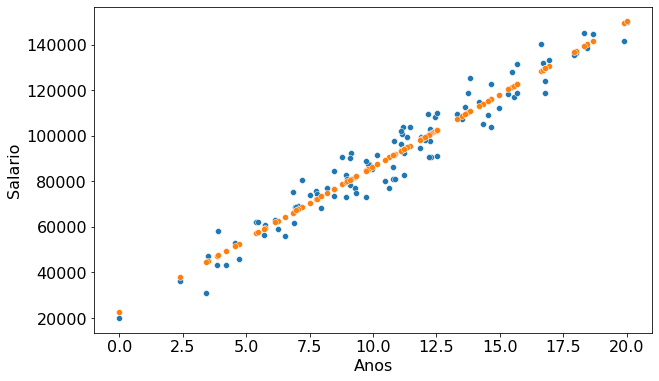

In [ ]:
sns.scatterplot(x='Anos',y='Salario',data=salarial)
sns.scatterplot(x='Anos',y='y_previsto',data=salarial)

In [ ]:
import numpy as np

In [ ]:
Xnovo = np.linspace(20,30,11)

In [ ]:
Xnovo = sm.add_constant(Xnovo)

In [ ]:
fora_da_amostra = resultado_regressao.predict(Xnovo)

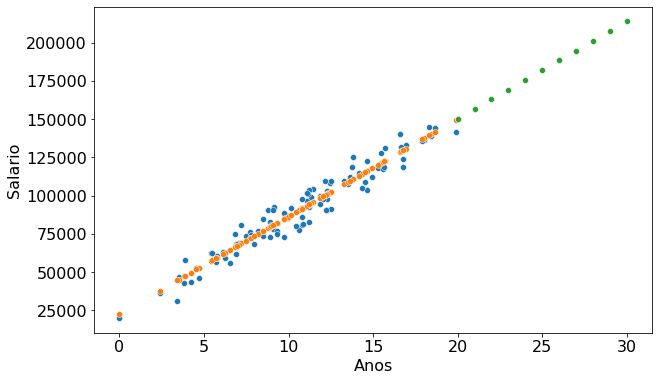

In [ ]:
sns.scatterplot(x='Anos',y='Salario',data=salarial)
sns.scatterplot(x='Anos',y='y_previsto',data=salarial)
sns.scatterplot(x=Xnovo[:,1],y=fora_da_amostra)

## <font color=blue>  Resíduos </font>

\begin{equation} 
\hat{u}_i = Y_i - \hat{Y}_i
\end{equation}

In [ ]:
salarial['Resíduo'] = resultado_regressao.resid
salarial.head()

,Anos,Salario,y_previsto,Resíduo
0,9.096218,78311.160754,80676.613985,-2365.453231
1,14.637429,103897.664526,115961.045460,-12063.380934
2,12.255808,97836.261015,100795.744300,-2959.483285
3,7.215160,80550.256380,68698.714847,11851.541534
4,6.905628,68555.820963,66727.732594,1828.088369



1. Média igual a zero;

In [ ]:
salarial['Resíduo'].mean()

1.7316779121756553e-11

2. Os valores de $u$ são independentes.

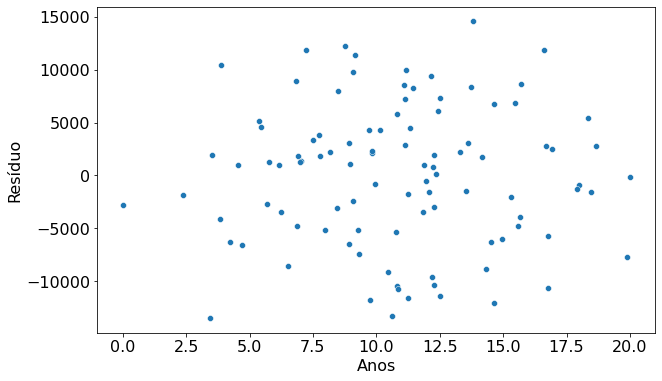

In [ ]:
sns.scatterplot(x=salarial['Anos'], y=salarial['Resíduo'])

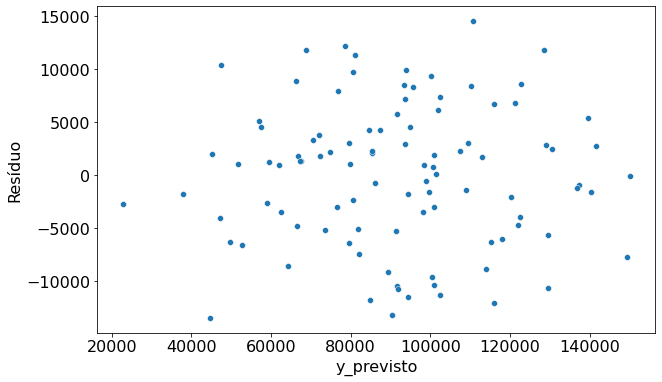

In [ ]:
sns.scatterplot(x=salarial['y_previsto'], y=salarial['Resíduo'])

3. Variância de $u$ é a mesma para todos os valores de X;

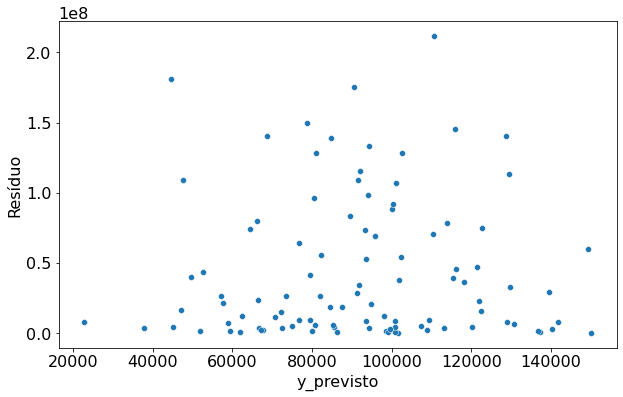

In [ ]:
sns.scatterplot(x=salarial['y_previsto'], y=salarial['Resíduo']**2)

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

## <font color=blue>  Coeficiente de determinação - $R^2$ </font>

O quanto a linha de regressão amostral se ajusta aos dados.

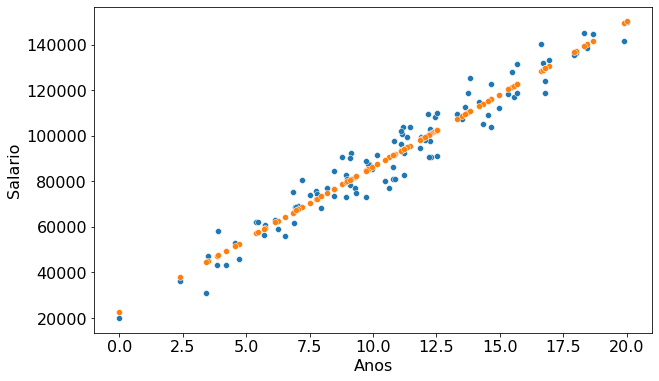

In [ ]:
sns.scatterplot(x='Anos',y='Salario',data=salarial)
sns.scatterplot(x='Anos',y='y_previsto',data=salarial)

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

In [ ]:
resultado_regressao.rsquared

0.9417294727711081